## Confusion Matrix of wine Dataset using DBSCAN

분류 모델의 성능을 측정하기 위한 confusion matrix

실제 타겟의 값을 분류 모델을 통해 예측한 값과 비교

Confusion matrix를 통해 분류 모델의 성능을 확인할 수 있으며, 어떤 종류의 오류가 발생하는지 확인 가능

<span style="color: #2D3748; background-color:#fff5b1;">Test size 0.2로 10번 반복 실험한 결과 setosa에 대한 분류는 잘 하지만 versicolor와 virginica를 잘못 분류하는 경우가 발생하였다.</span>

<span style="color: #2D3748; background-color:#fff5b1;">반복 실험 동안 계속 잘 못 분류되는 데이터를 분석한 결과 virginica label을 가진 데이터가 versicolor 데이터 특징과 거의 동일하기 때문에 분류하지 못하였다.</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\LAB\Anaconda3\envs\lab\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
wine = load_wine()

features = wine.data
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

target = wine.target
target_names = wine.target_names.tolist()
target_names = target_names + ['outlier']

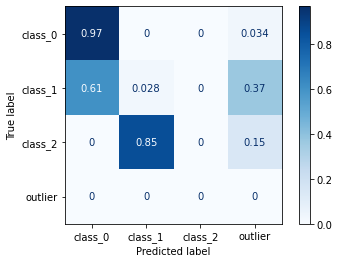

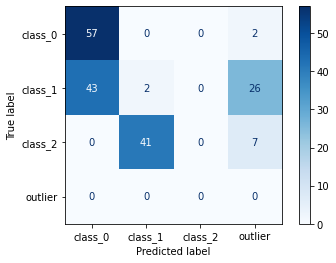

In [3]:
epsilon = 0.5
point = 10

db = DBSCAN(eps=epsilon, min_samples=point, n_jobs=-1)

db.fit(features, target)
predict = db.labels_
predict[db.labels_ == -1] = 3

cm = confusion_matrix(target, predict, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

cm = confusion_matrix(target, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)

## Analysis Dataset